<a href="https://colab.research.google.com/github/maudlcrf/deep_learning/blob/main/food_detection_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work - Food Object Detection

**Presented By:**
- Luis García Pérez
- Nicole Herrera
- Jo Krumsvik
- Maud Lecerf
- Cristina Mosquera
- Mayra Perez Chantes
- Christopher Stephan

## **SetUp + Import Relevant Libraries**

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 885.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7

In [ ]:
!pip uninstall -y torchvision


Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124


In [ ]:
!pip install torchvision==0.18.0+cu118 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: nvidia-nccl-cu11
    Found existing installation: nvidia-nccl-cu11 2.21.5
    Uninstalling nvidia-nccl-cu11-2.21.5:
      Successfully uninstalled nvidia-nccl-cu11-2.21.5
  Attempting uninstall: nvidia-cudnn-cu11
    Found existing installation: nvidia-cudnn-cu11 9.1.0.70
    Uninstalling nvidia-cudnn-cu11-9.1.0.70:
      Successfully uninstalled nvidia-cu

In [ ]:
import torch
import torchvision

print(f"✅ PyTorch version: {torch.__version__}")
print(f"✅ torchvision version: {torchvision.__version__}")


✅ PyTorch version: 2.3.0+cu118
✅ torchvision version: 0.18.0+cu118


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.6/112.6 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
import os
import numpy as np
import matplotlib.image as mpimg

### **Install YOLO V 11** FIRST CHANGE

In [ ]:
from ultralytics import YOLO
# Attempt to download the model weights if they don't exist locally
model = YOLO('yolo11s.pt')

100%|██████████| 18.4M/18.4M [00:00<00:00, 133MB/s]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml

## **Import dataset**

Importing the dataset with the API generated by Roboflow with Mayra's account

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="cBLWWZ4l2OGfXB6ucqNy")
project = rf.workspace("rahmanouri").project("objects_detection-t7zsg")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Objects_Detection--3 in yolov11:: 100%|██████████| 20674/20674 [00:03<00:00, 5512.31it/s]


In [ ]:
print(f"✅ Dataset is located at: {dataset.location}")


✅ Dataset is located at: /content/datasets/Objects_Detection--3


Looking what is inside the path we imported.

#### Directory contents:
- 'valid': Directory containing validation images (images used to validate the model during training).
- 'README.dataset.txt': Text file with dataset-related information or instructions from Roboflow.
- 'train': Directory containing training images (images used to train the model).
- 'test': Directory containing test images (images used to evaluate the model's performance after training).
- 'data.yaml': YAML configuration file containing dataset-specific information such as class names, image size, etc.
- 'README.roboflow.txt': Text file with Roboflow-specific information or instructions, often regarding how the dataset was created or annotated.

In [ ]:
dataset_path = "Objects_Detection--3"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("Dataset directory exists!")
    print("Contents:")
    print(os.listdir(dataset_path))  # List files in the directory
else:
    print("Dataset directory not found!")

Dataset directory exists!
Contents:
['valid', 'README.dataset.txt', 'train', 'data.yaml', 'README.roboflow.txt', 'test']


The following code shows the number of elements in each folder.

In [ ]:
def count_images(directory):
    """Count the number of image files in the given directory."""
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']  # List of common image file extensions
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Counting images in each directory
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)

# Display the counts
print(f"Train Set: {train_count} images")
print(f"Valid Set: {valid_count} images")
print(f"Test Set: {test_count} images")

Train Set: 9248 images
Valid Set: 667 images
Test Set: 416 images


With the following code the first images per each folder are displayed.

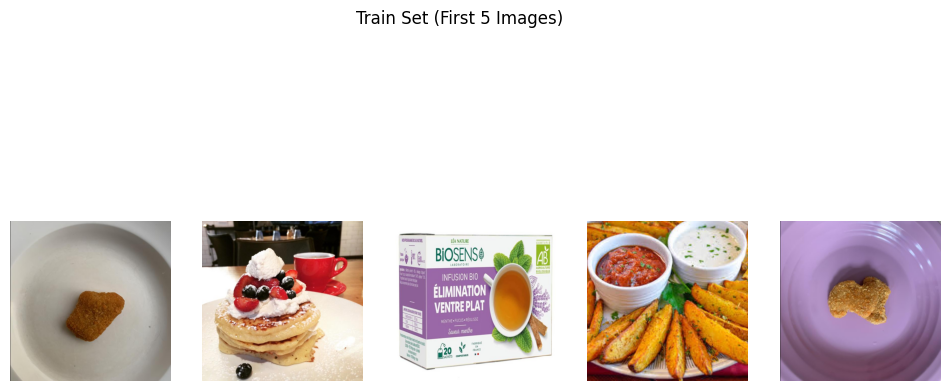

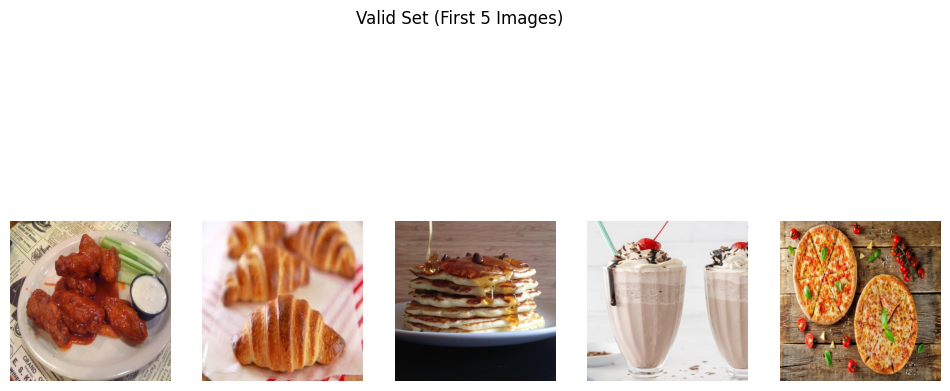

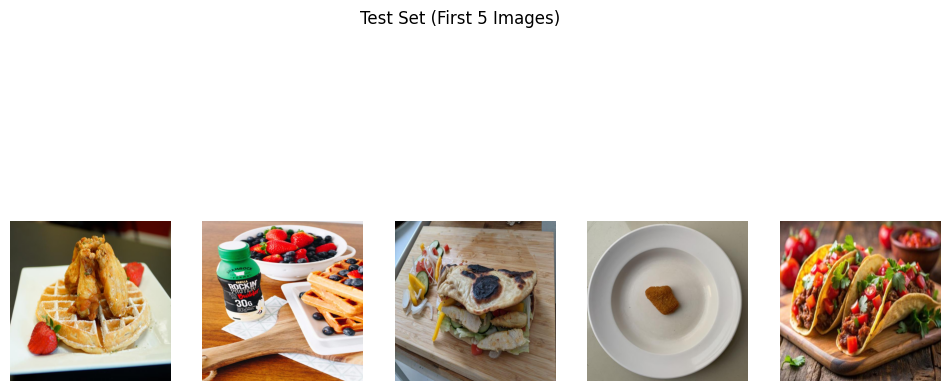

In [ ]:
def display_first_few_images(directory, num_images=5):
    """Display the first few image files from the directory."""
    image_files = []
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

    # Collect all image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))

    # Display the first `num_images` files
    return image_files[:num_images]

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Get first few images from each directory
train_images = display_first_few_images(train_dir)
valid_images = display_first_few_images(valid_dir)
test_images = display_first_few_images(test_dir)

# Function to display images
def plot_images(image_paths, title="Images"):
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(image_paths), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first few images from each set
plot_images(train_images, "Train Set (First 5 Images)")
plot_images(valid_images, "Valid Set (First 5 Images)")
plot_images(test_images, "Test Set (First 5 Images)")

The following code shows the number and different categories we have in the dataset.

In [ ]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"  # Adjust if necessary

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Display the dataset information
print("Dataset Information:")
print(f"- Number of Classes: {len(data_yaml['names'])}")
print(f"- Classes: {data_yaml['names']}")

Dataset Information:
- Number of Classes: 42
- Classes: ['05L_Watter', 'Baguette_Farcie', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Citronade', 'Coca_bottle', 'Fajitas', 'Fanta_Canette', 'Fanta_botlleS', 'Frittes', 'Garlic_BreadSticks', 'Humbrger', 'Jus_Kiwi', 'Jus_fraise', 'Large_pizza', 'Makloub', 'Medium_pizza', 'MilkChake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesdillas', 'Salade', 'Smal_pizza', 'Tacos', 'Tacos_Mexicain', 'The', 'coca_Canette', 'crepes', 'croissant', 'orange-juice', 'pizza_meter', 'sprite', 'waffles']


### **To-Do: Rename the classe properly**

In [ ]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Correct the class names
rename_map = {
    "Humbrger": "Burger",
    "Jus_fraise": "strawberry_juice",
    "Jus_Kiwi": "Kiwi_juice",
    "Salade":"Salad",
    "The": "Tea",
    "Citronade": "Lemonade",
    "Smal_pizza": "Small_Pizza",
    "pizza_meter": "Big_Pizza",
    "Tacos_Mexicain":"Mexican_Tacos",
    "MilkChake":"Milkshake",
    "Fanta_botlleS": "Fanta_bottle",
    "Fanta_Canette": "Fanta_can",
    "Coca_bottle": "Coke_bottle",
    "05L_Watter": "Water_bottle",
    "Baguette_Farcie" : "Baguette",
    "Frittes":"French_Fries",
    "Makloub":"Maklouba",
    "Quesdillas":"Quesadillas",
    "coca_Canette":"Coke_can"
}

# Apply the renaming
data_yaml['names'] = [rename_map.get(name, name) for name in data_yaml['names']]

# Save the updated YAML file
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print("✅ Updated class names in data.yaml!")
print(f"- Classes: {data_yaml['names']}")



✅ Updated class names in data.yaml!
- Classes: ['Water_bottle', 'Baguette', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Lemonade', 'Coke_bottle', 'Fajitas', 'Fanta_can', 'Fanta_bottle', 'French_Fries', 'Garlic_BreadSticks', 'Burger', 'Kiwi_juice', 'strawberry_juice', 'Large_pizza', 'Maklouba', 'Medium_pizza', 'Milkshake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesadillas', 'Salad', 'Small_Pizza', 'Tacos', 'Mexican_Tacos', 'Tea', 'Coke_can', 'crepes', 'croissant', 'orange-juice', 'Big_Pizza', 'sprite', 'waffles']


## **Base Model**

### **Training**

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Objects_Detection--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

In [ ]:
!ls -lh runs/detect/train

total 9.4M
-rw-r--r-- 1 root root 1.6K Feb 13 14:12 args.yaml
-rw-r--r-- 1 root root 467K Feb 13 14:44 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 468K Feb 13 14:44 confusion_matrix.png
-rw-r--r-- 1 root root 272K Feb 13 14:44 events.out.tfevents.1739455953.29ec782a3368.2708.0
-rw-r--r-- 1 root root 672K Feb 13 14:44 F1_curve.png
-rw-r--r-- 1 root root 271K Feb 13 14:12 labels_correlogram.jpg
-rw-r--r-- 1 root root 273K Feb 13 14:12 labels.jpg
-rw-r--r-- 1 root root 608K Feb 13 14:44 P_curve.png
-rw-r--r-- 1 root root 243K Feb 13 14:44 PR_curve.png
-rw-r--r-- 1 root root 507K Feb 13 14:44 R_curve.png
-rw-r--r-- 1 root root 1.4K Feb 13 14:44 results.csv
-rw-r--r-- 1 root root 262K Feb 13 14:44 results.png
-rw-r--r-- 1 root root 609K Feb 13 14:12 train_batch0.jpg
-rw-r--r-- 1 root root 506K Feb 13 14:12 train_batch1.jpg
-rw-r--r-- 1 root root 514K Feb 13 14:12 train_batch2.jpg
-rw-r--r-- 1 root root 609K Feb 13 14:44 val_batch0_labels.jpg
-rw-r--r-- 1 root root 621K Feb 13 14:

In [ ]:
!find runs/ -name "*.pt"

runs/detect/train/weights/last.pt
runs/detect/train/weights/best.pt


In [ ]:
!cat runs/detect/train/args.yaml

task: detect
mode: train
model: yolo11s.pt
data: /content/datasets/Objects_Detection--3/data.yaml
epochs: 10
time: null
patience: 100
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: train
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 10
resume: false
amp: true
fraction: 1.0
profile: false
freeze: null
multi_scale: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
vid_stride: 1
stream_buffer: false
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
embed: null
show: false
save_frames: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
show_boxes: true
line_width: null
format: torchscript
keras: false
optimize: false
int

In [ ]:
!find runs/ -name "*.pt"

runs/detect/train/weights/last.pt
runs/detect/train/weights/best.pt


### **Validating**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,429,054 parameters, 0 gradients, 21.4 GFLOPs
val: Scanning /content/datasets/Objects_Detection--3/valid/labels.cache... 667 images, 1 backgrounds, 0 corrupt: 100% 667/667 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 42/42 [00:10<00:00,  4.12it/s]
                   all        667       1315      0.677       0.65       0.71      0.539
          Water_bottle         36        112      0.744      0.723      0.762      0.363
              Baguette         16         25       0.59       0.92      0.765      0.616
              Burritos   

#### Interpretting the Validation:

**Geeral model Performance**
- mAP50 = 0.71 → The model correctly detects objects 68% of the time at a 50% IoU threshold.
- mAP50-95 = 0.539 → A more strict evaluation across multiple IoU thresholds shows an overall accuracy of 52.3%.
- Precision (P) = 0.65 → About 59.8% of detections are correct (i.e., fewer false positives).
- Recall (R) = 0.677 → The model detects 71.7% of actual objects (i.e., missing some instances).

**What this means**
- The model is reasonably accurate but has room for improvement in localization quality.
- The gap between mAP50 and mAP50-95 suggests that the model is struggling with precise bounding box placement at higher IoU thresholds.

**Class Performance**

✅ Best Performing Classes:

- Fanta_bottle (mAP50 = 0.995, Recall = 1.00) → Perfect detection accuracy.
- crepes (mAP50 = 0.995, Recall = 1.00) → Also perfectly detected.
- strawberry_juice (mAP50 = 0.897, Recall = 0.845) → Very high accuracy.
- French_Fries (mAP50 = 0.882, Recall = 0.889) → Well-detected class.

❌ Worst Performing Classes:

- Chichen_Poppers (mAP50 = 0.113, Recall = 0.154) → Very poor detection rate.
- Tea (mAP50 = 0.272, Recall = 0.187) → The model struggles to detect this class.
- Burritos (mAP50 = 0.313, Recall = 0.25) → Low recall means the model often fails to detect burritos.
- Pepsi (mAP50 = 0.337, Recall = 0.179) → Weak detection accuracy.

💡 Why Some Classes Perform Poorly:

- Not enough training images → The model may not have seen enough examples of certain food items.
- Objects are too small or overlapping, making detection difficult.
- Class imbalance → The model prioritizes classes with more training images.


#### List of contents inside the /train directory

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1739455953.29ec782a3368.2708.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


##### **Using the Confusion Matrix to evaluate the Base Model**

### What to look for?


#### Diagonal Cells (Top-left to Bottom-right):

- These are the correct predictions for each class.

- The higher the value (darker blue), the better the model is at predicting this class.
Example: If the cell for "05L_Watter" (row) and "05L_Watter" (column) has a high value, the model correctly predicts "05L_Watter."

#### Off-diagonal Cells (Non-diagonal):

- These represent misclassifications.

- Example: If the "Chicken Nuggets" row has values in the "Chicken Poppers" column, the model confuses Chicken Nuggets as Chicken Poppers.

#### Class Imbalances
- If one class (e.g., **"Chicken Poppers"**) has significantly more correct predictions than others, it may mean the model is **overfitting to that class**.
- A lighter diagonal may indicate that the class has **fewer instances** or is **harder to classify**.

#### Confusions Between Similar Classes
- Look for **off-diagonal cells with high values**.
- **Example:** If **"Fanta_Canette"** is misclassified as **"Coca_bottle"**, it may indicate that these classes have **similar visual features**.

#### Background (Last Row and Column)
- The **"background"** row and column measure how well the model handles **false positives** and **false negatives**.
- If the **"background"** row has high values in non-background columns, the model is incorrectly classifying **background regions as objects**.


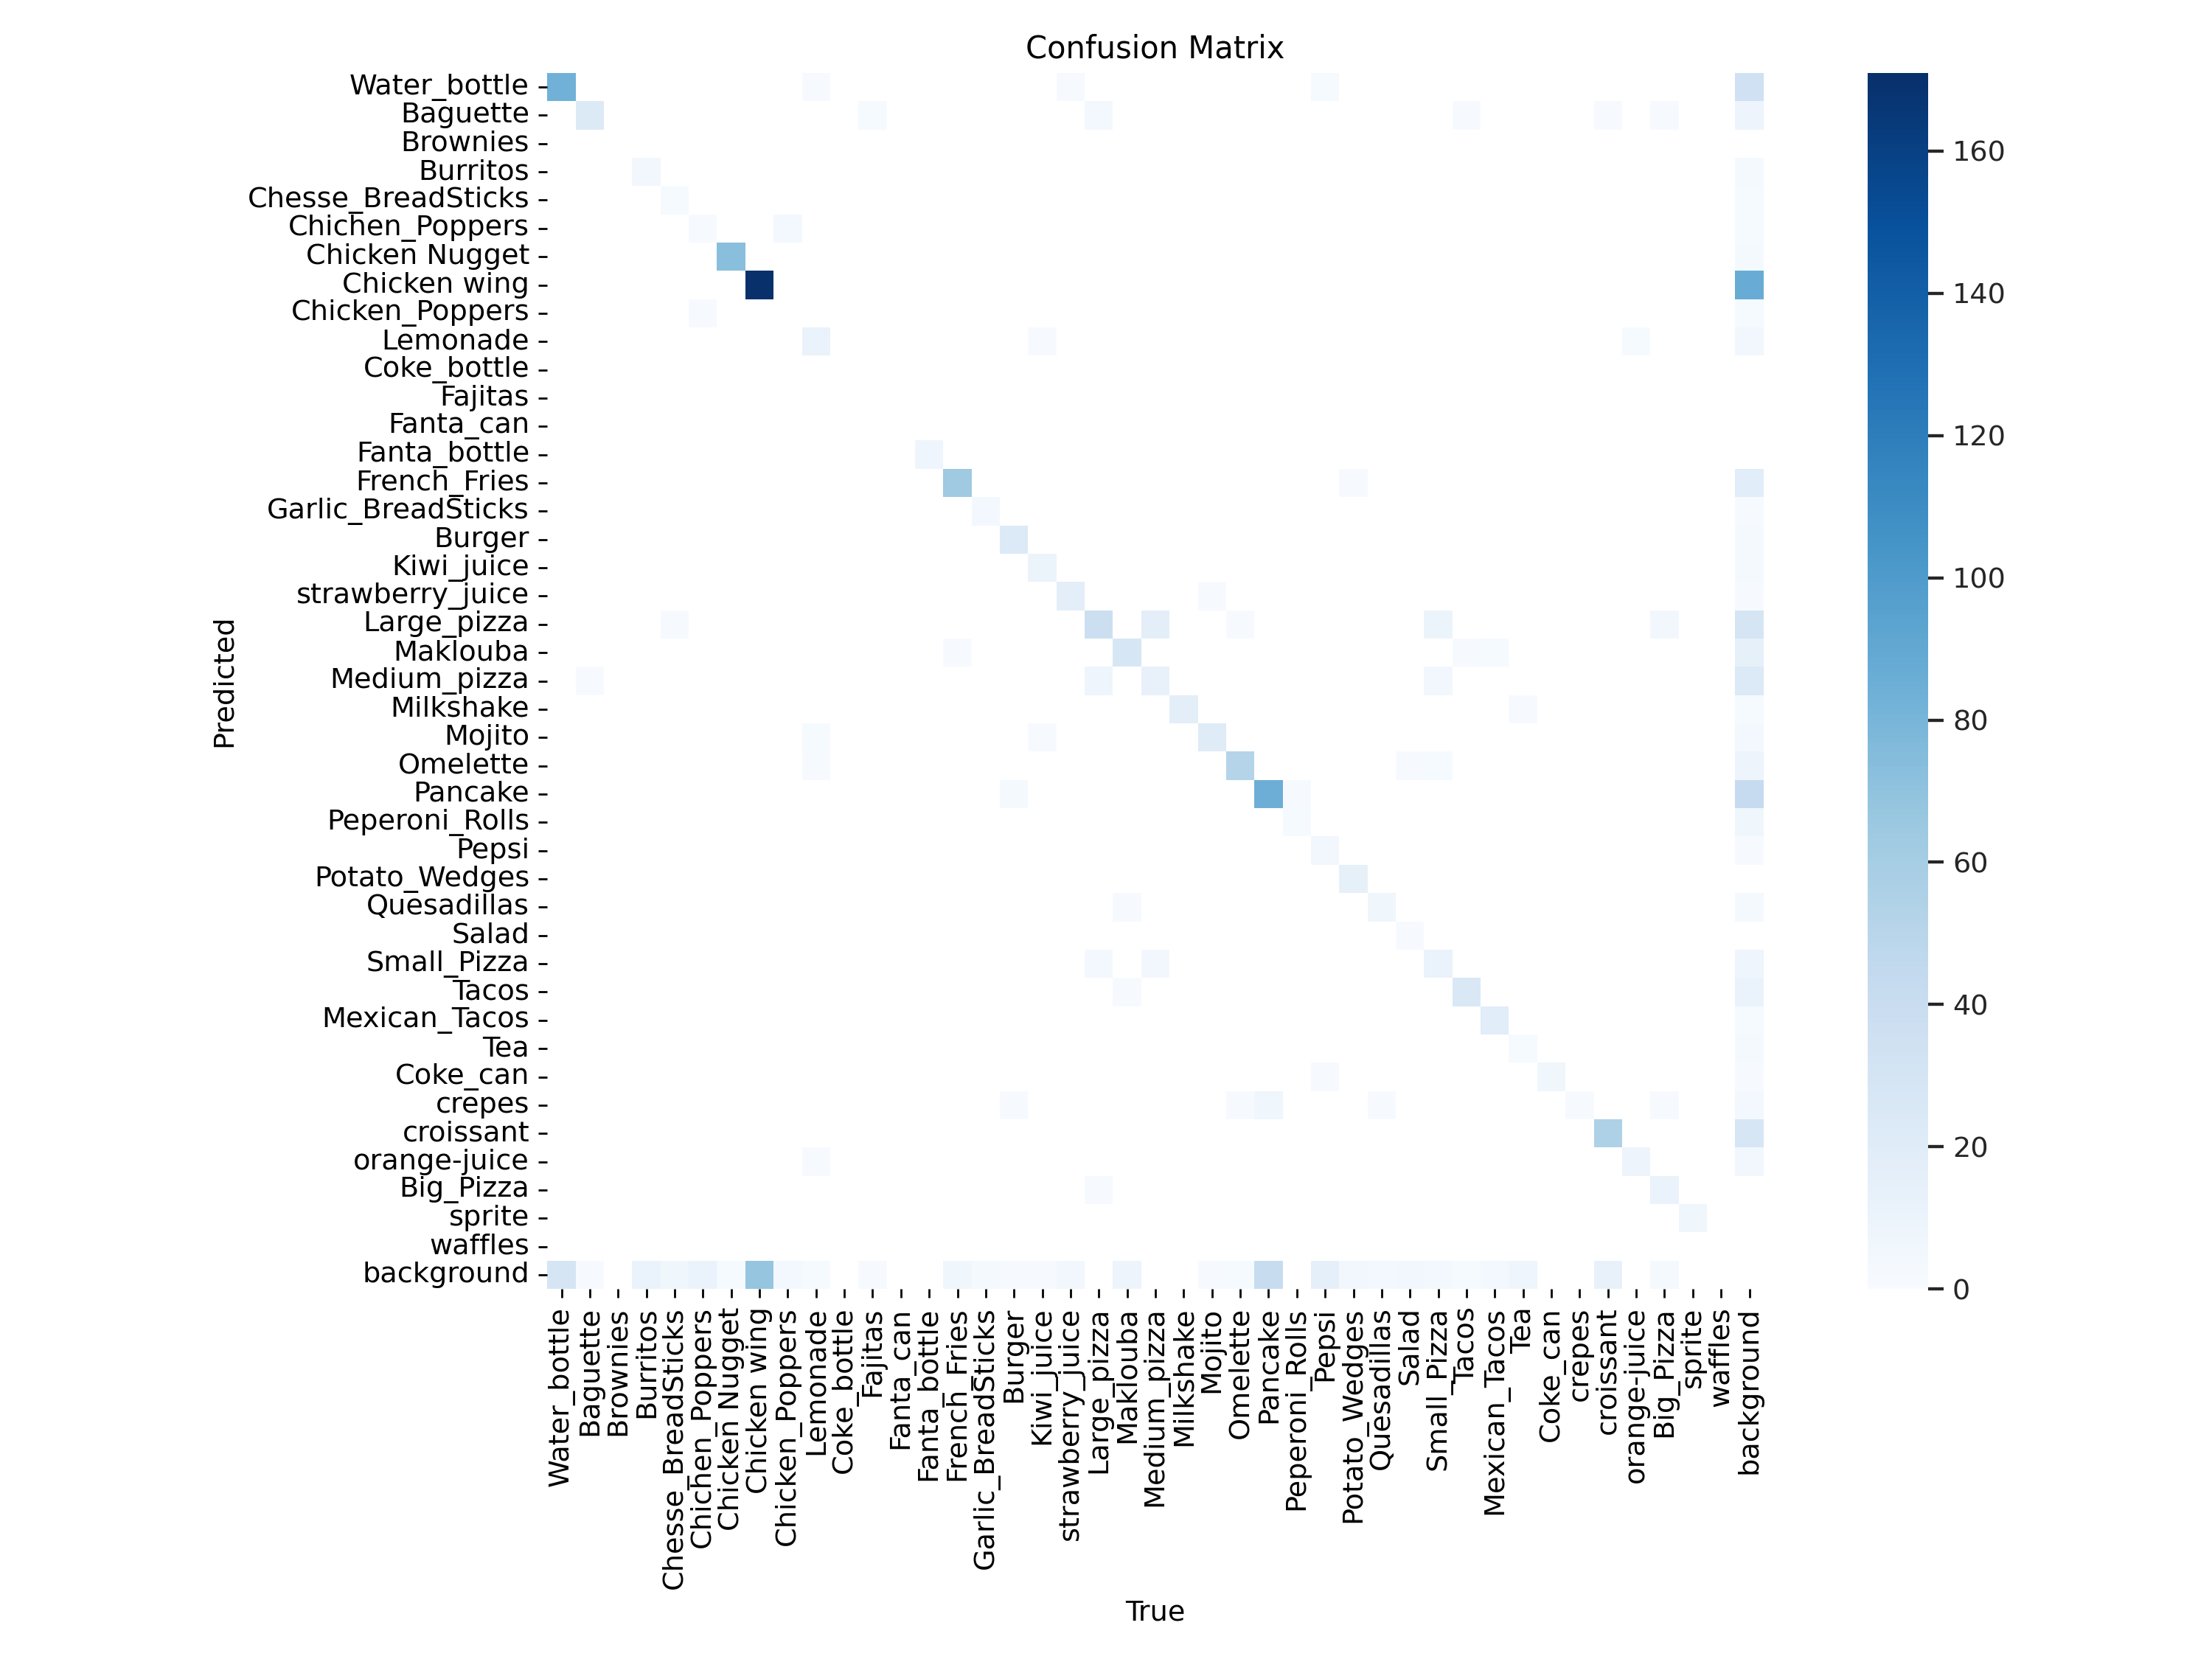

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

**Key Observations**

- **Strong Diagonal Line** → Good Performance. The presence of a strong diagonal means that many classes are being correctly classified.
- Darker squares along the diagonal indicate higher accuracy in those classes.

- **Misclassifications (Off-Diagonal Values)** Lighter squares outside the diagonal mean some classes are being confused with others.
- Some misclassified items include:
Chicken Poppers → Other chicken dishes
Baguette → Similar bread-based foods
Pepsi → Other soft drinks

- **Background Misclassification**. A few objects might be incorrectly labeled as "background", indicating missed detections.

##### **Other graphs to show the training and validation performance**

###How to read the results:
#### **1️. Training Loss**
- **`train/box_loss`:**  
  Measures how well the model predicts bounding box locations.  
  - The **lower the loss**, the more accurate the bounding boxes are.  
  - The **downward trend** indicates that the model is learning to predict bounding boxes better over time.

- **`train/cls_loss`:**  
  Measures how well the model predicts the correct class for each detected object.  
  - A **steadily decreasing trend** shows that the model is improving its classification performance.

- **`train/dfl_loss`:**  
  Refers to **distribution focal loss**, which measures the quality of bounding box regression.  
  - A **consistent decrease** means the model is getting better at refining bounding box coordinates.



#### **2️. Validation Loss**
- **`val/box_loss`:**  
  Measures bounding box prediction performance on the validation set.  
  - Should follow a **similar decreasing trend** as `train/box_loss`.  
  - If the validation loss stops decreasing or increases, it may indicate **overfitting**.

- **`val/cls_loss`:**  
  Measures classification performance on the validation set.  
  - A decrease shows that the model generalizes well to unseen data.  
  - If it stops improving or increases, it may indicate **overfitting**.

- **`val/dfl_loss`:**  
  Measures the bounding box regression quality for the validation set.  
  - Should also decrease steadily, similar to `train/dfl_loss`.



#### **3️. Precision, Recall, and mAP Metrics**
- **`metrics/precision`:**  
  Measures how many of the predicted objects are correct.  
  - A **higher precision (close to 1)** means the model is less likely to make false positive predictions.

- **`metrics/recall`:**  
  Measures how many of the actual objects the model correctly detects.  
  - A **higher recall** indicates the model is detecting more true objects.

- **`metrics/mAP50`:**  
  Mean Average Precision at **IoU=0.50**.  
  - **Higher values (closer to 1)** indicate better overall object detection performance.  
  - The smooth upward trend suggests the model is learning effectively.

- **`metrics/mAP50-95`:**  
  Mean Average Precision across IoU thresholds from **0.50 to 0.95**.  
  - A tougher evaluation metric than mAP50. Higher values indicate better performance.  
  - A steady increase indicates good generalization.


### **Key Insights**
1. **Steady Loss Decrease:**  
   - Both training and validation losses are decreasing, which shows the model is learning.  
   - There’s no significant divergence between training and validation losses, indicating no overfitting.

2. **Precision and Recall:**  
   - Both are improving over the epochs, which means the model is becoming better at detecting and classifying objects.

3. **mAP50 and mAP50-95:**  
   - mAP50 improves quickly and reaches a reasonable value (>0.7), indicating good performance at IoU=0.50.  
   - mAP50-95 is lower but still improves, which is expected as it is a more challenging metric.





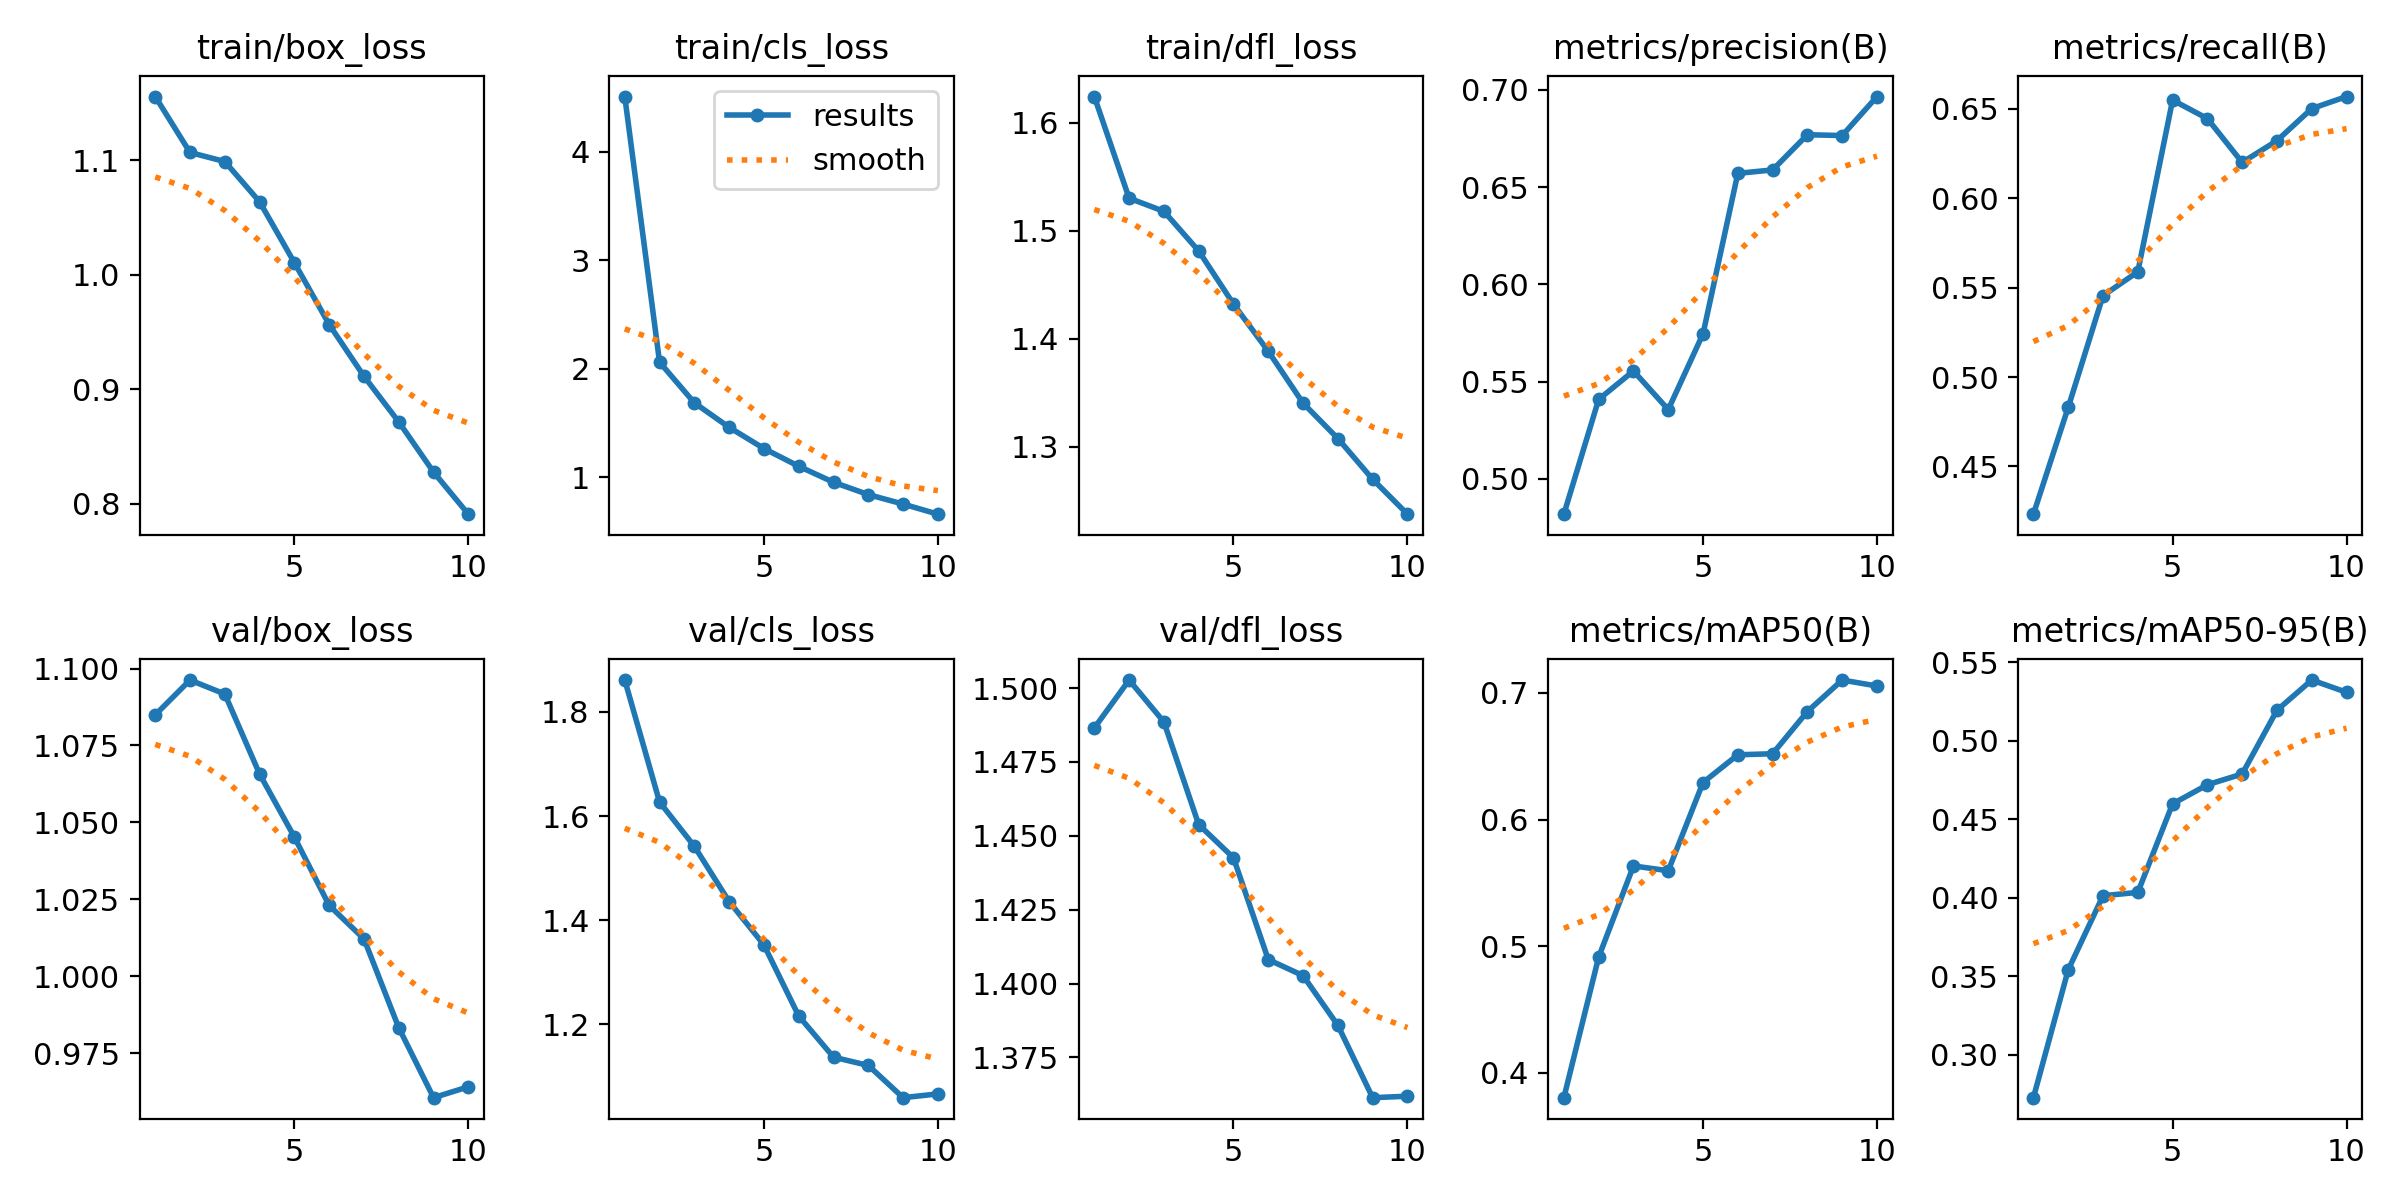

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=900)

**Key Observations**

Losses Are Decreasing
- train/box_loss, train/cls_loss, train/dfl_loss → Steady decline, meaning the model is learning well.
- val/box_loss, val/cls_loss, val/dfl_loss → Also decreasing, indicating the model generalizes well to validation data.

Precision & Recall Improving
- Precision & Recall curves show a clear upward trend, meaning fewer false positives and false negatives over time.

mAP50 & mAP50-95 Increasing
- mAP50 (B) → Reaches ~0.7 → Good detection accuracy.
- mAP50-95 (B) → Reaches ~0.55 → Decent consistency across IoU thresholds.

Any Issues?
- If losses stop decreasing or increase at some point, you might be overfitting.
- If mAP stops improving before reaching an optimal value, training for more epochs (e.g., from 10 → 50) could help.

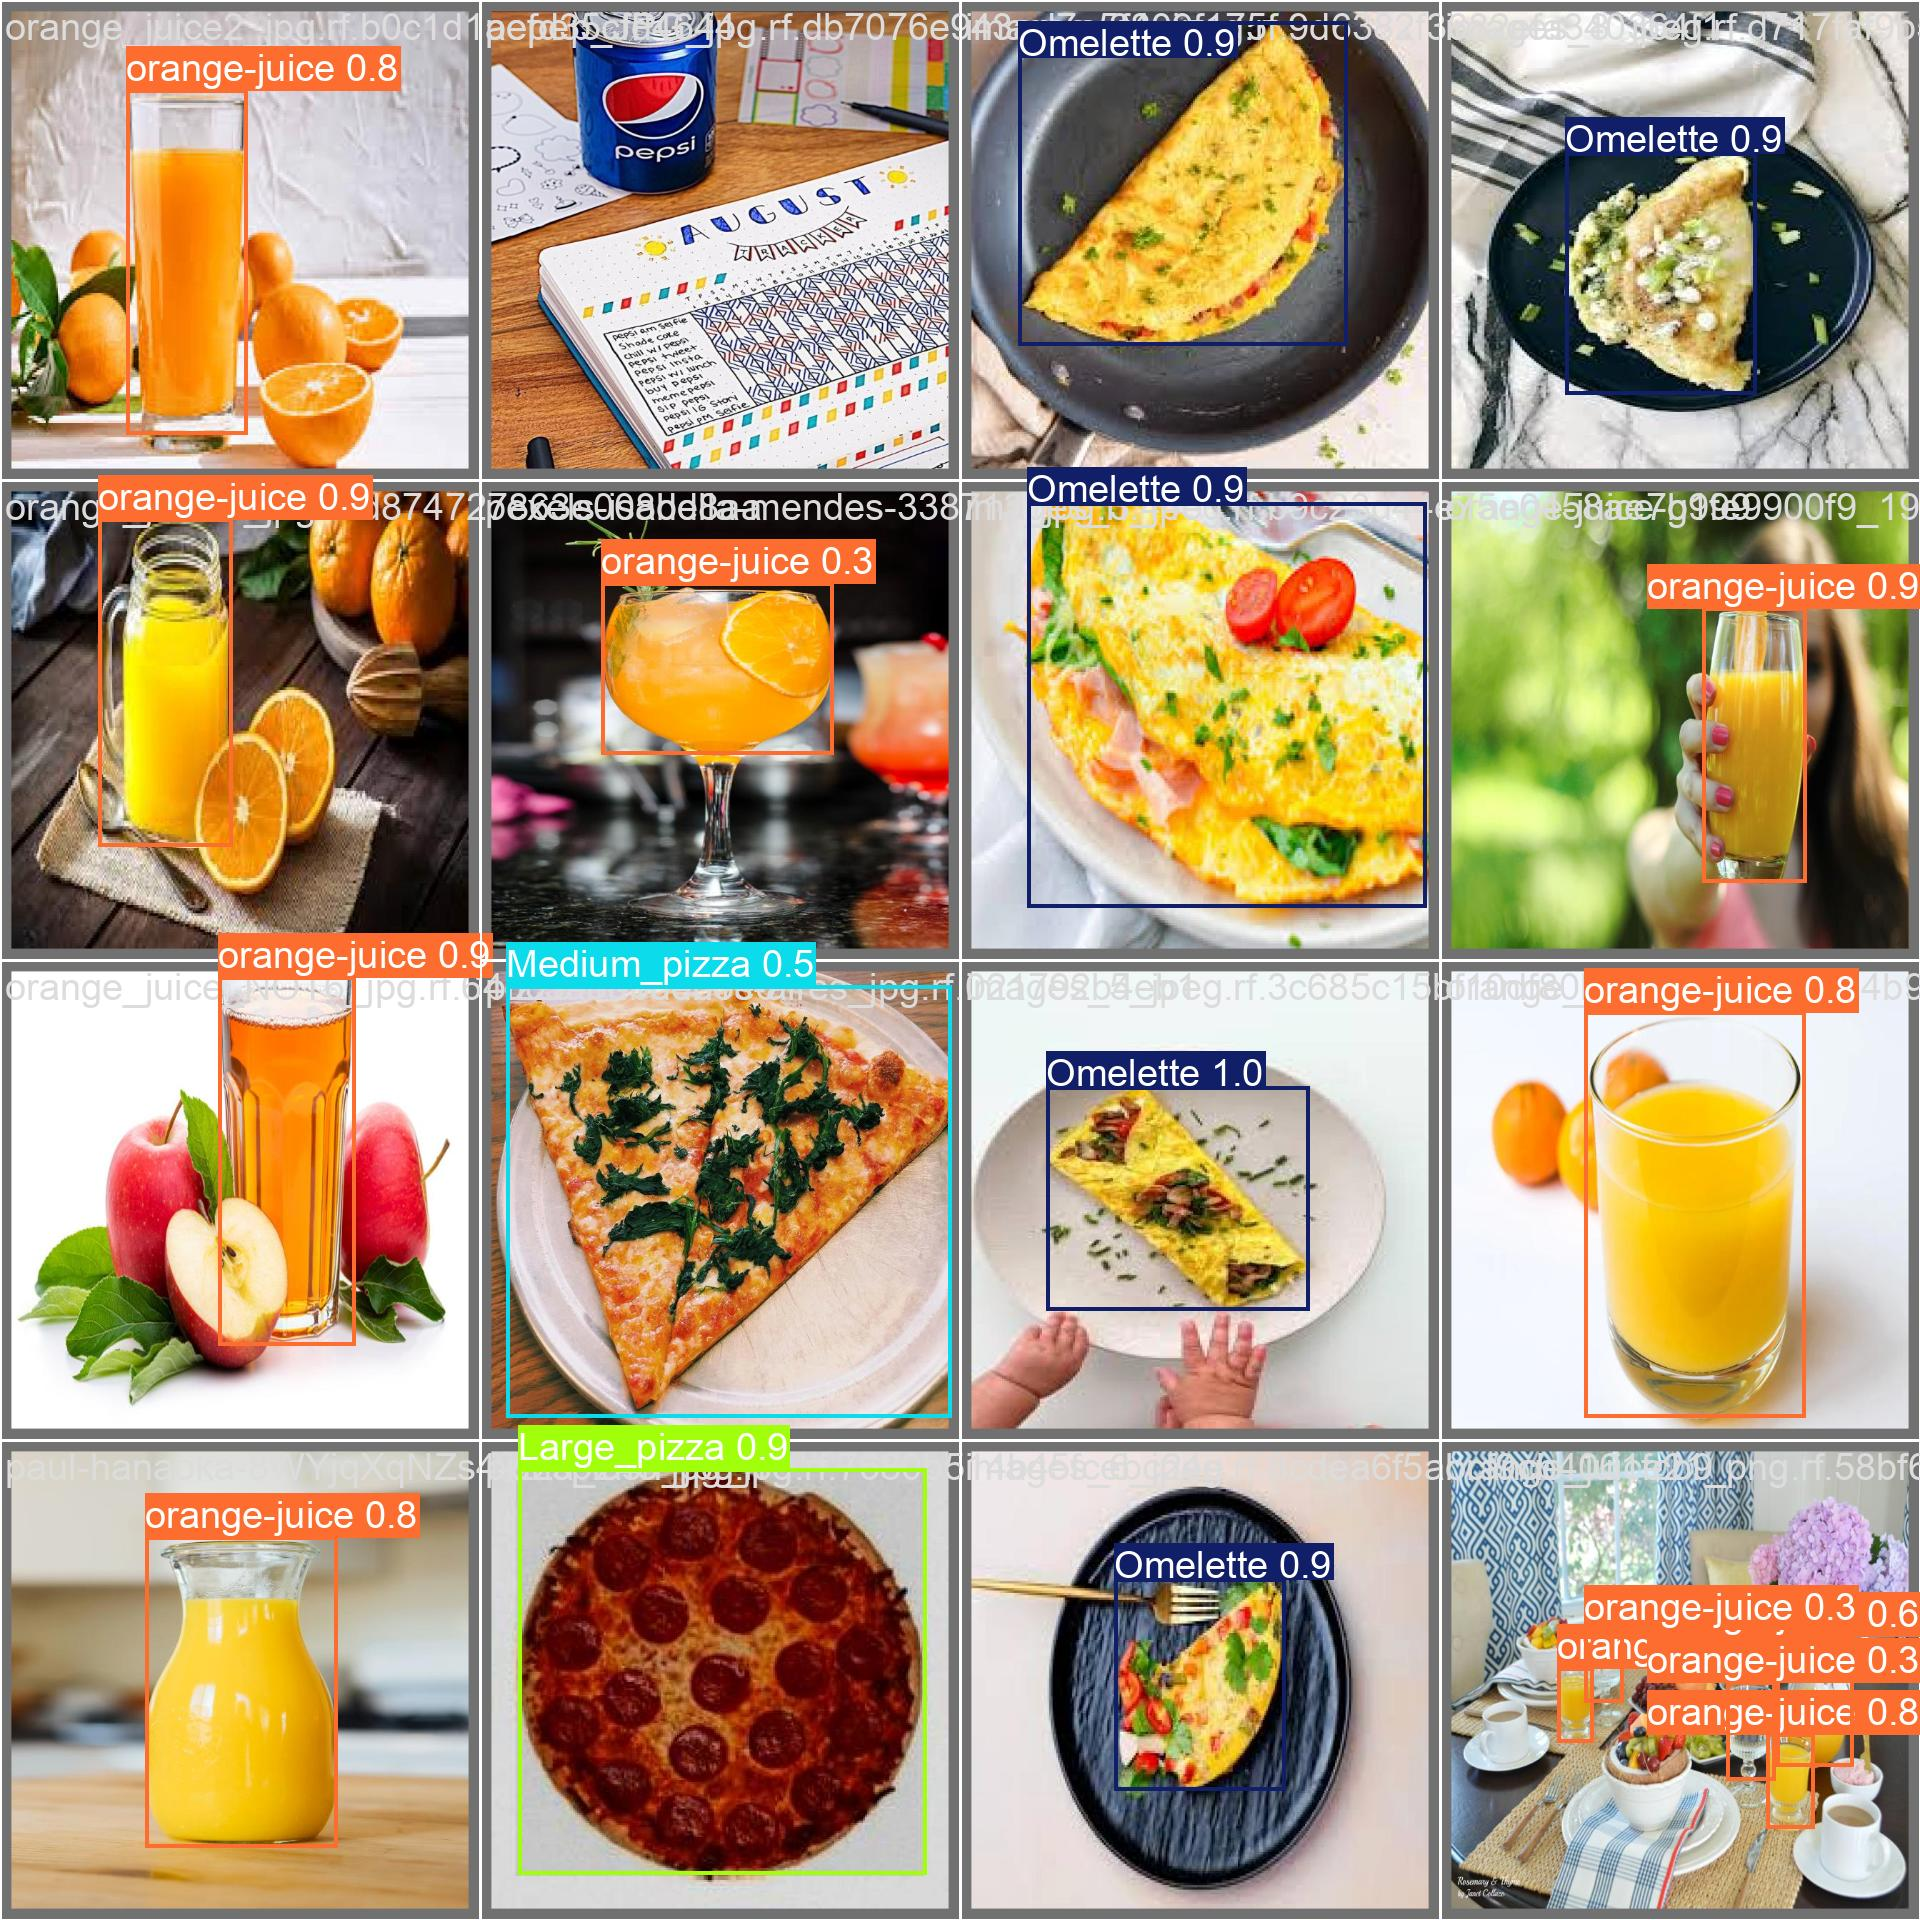

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### **Testing**

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.3.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,429,054 parameters, 0 gradients, 21.4 GFLOPs

image 1/416 /content/datasets/Objects_Detection--3/test/images/001cc5358fb67602_jpg.rf.22f8528109bcf8d74cce00a46eaa4360.jpg: 640x640 5 Pancakes, 15.8ms
image 2/416 /content/datasets/Objects_Detection--3/test/images/0157eae7b8cb1c57_jpg.rf.54ab109095e7003b32691323acd69c6a.jpg: 640x640 3 Pancakes, 15.8ms
image 3/416 /content/datasets/Objects_Detection--3/test/images/015b2fbc36b63087_jpg.rf.be3fda7534c78fb747cdecd99dc469dd.jpg: 640x640 2 Pancakes, 15.7ms
image 4/416 /content/datasets/Objects_Detection--3/test/images/01a0a727dad6c2e7156f7e67c70c94cb5e340c4c60955afe0f5a137f3bfde9e9_png.rf.dc9b2dbda579b19e970cc70cdf8df3b9.jpg: 640x640 (no detections), 15.8ms
image 5/416 /content/datasets/Objects_Detection--3/test/images/01cdf2231b2d1f0a4958a748fc69ebe2fae66412c9258daf123b596b2daa916c_png.rf.e927730cd0e65c0ddb4fa99c97e0cf06.jpg:

#### Checking the results

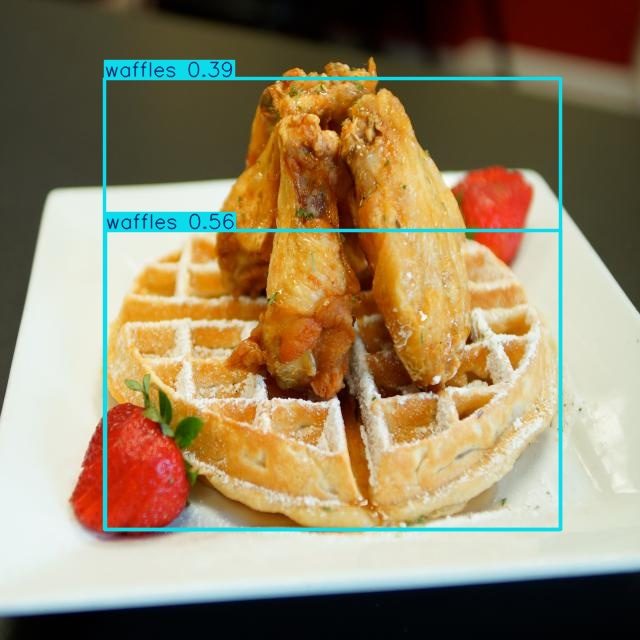

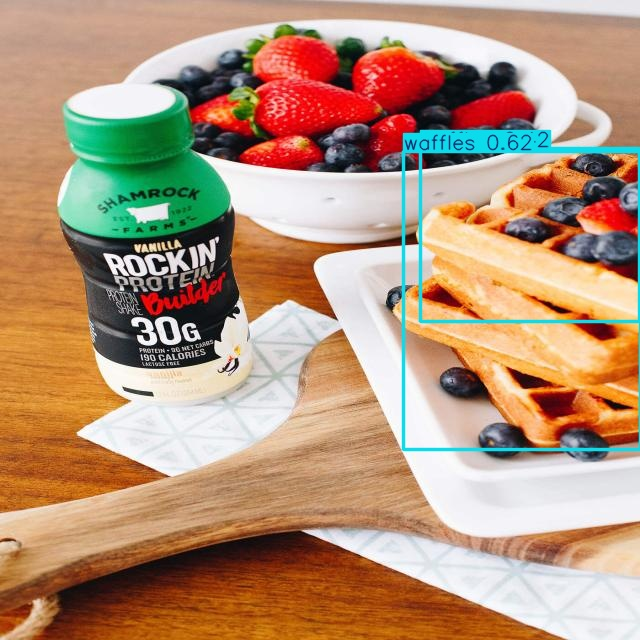

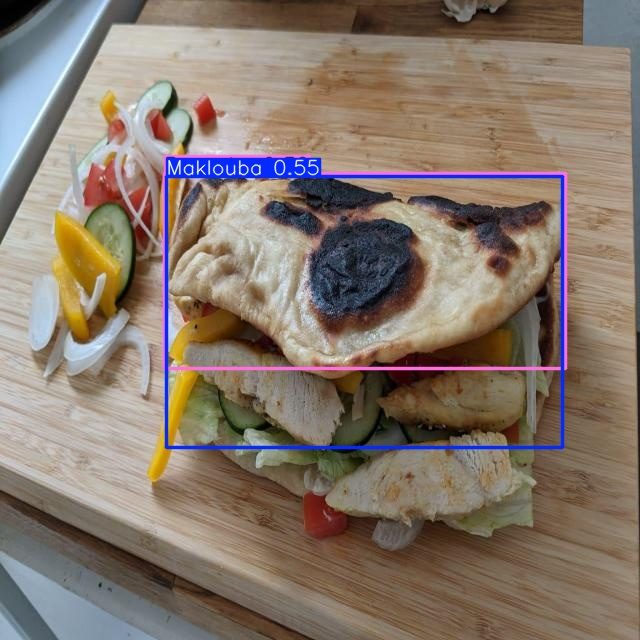

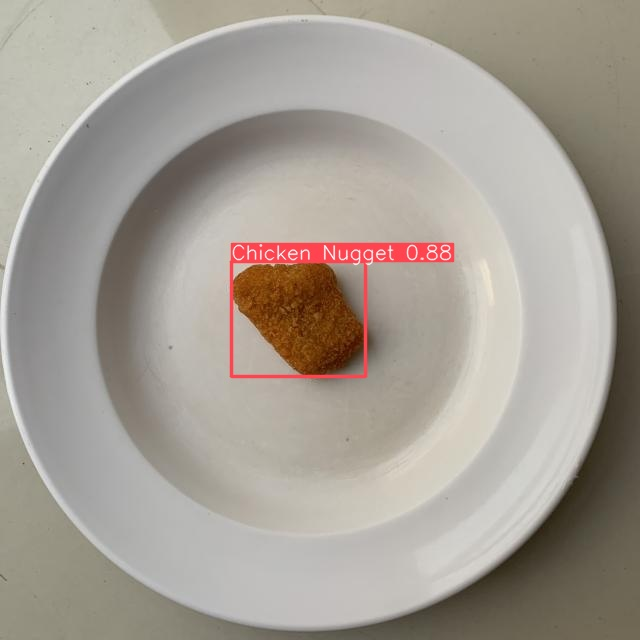

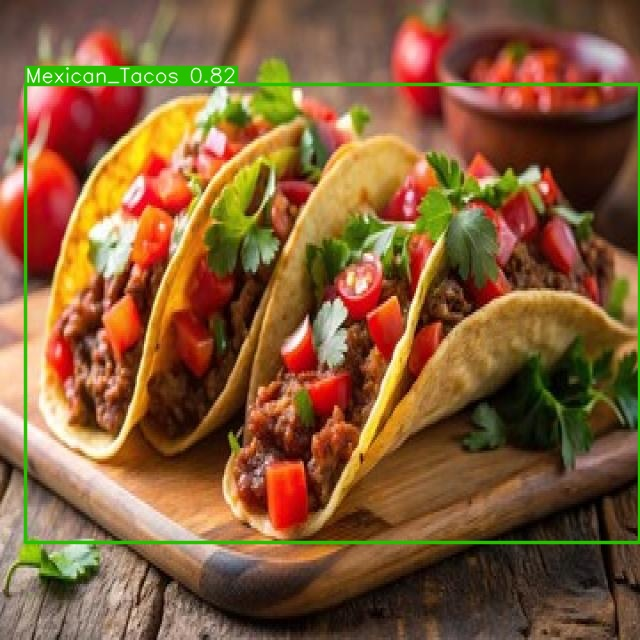

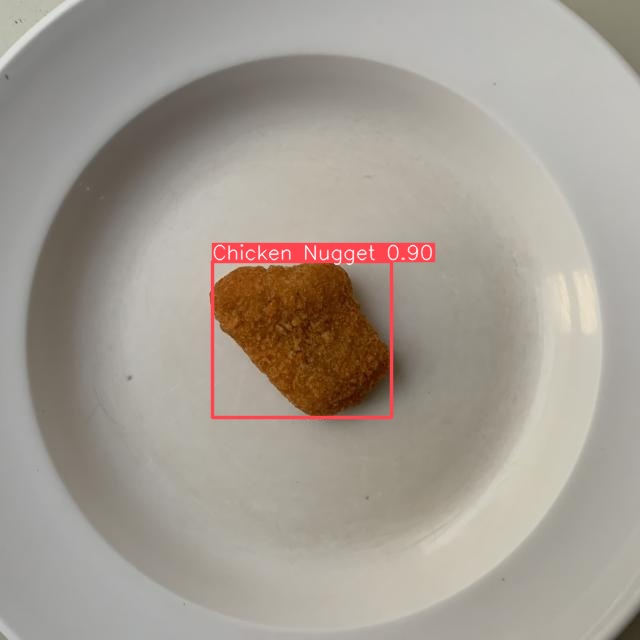

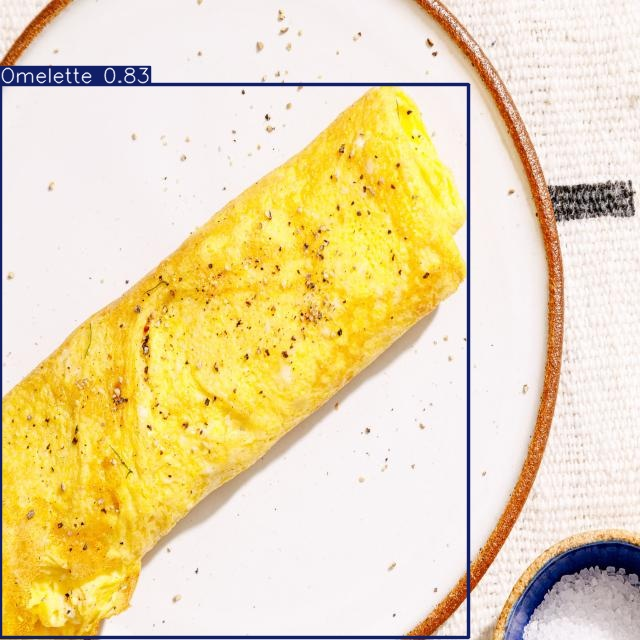

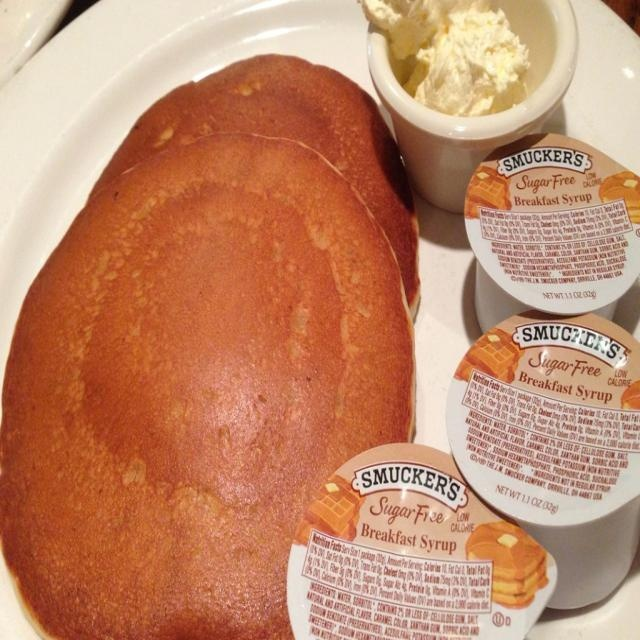

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## **Deploy Base Model on Roboflow**


In [ ]:
project = rf.workspace("nicoleherrera").project("objects_detection-t7zsg-xlqce")

# Check existing versions
versions = project.versions()
print("Available versions:", [v.version for v in versions])

# Use the correct version (change if needed)
version = project.version(2)  # Update if needed

# Deploy the model
version.deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")


In [ ]:
!pip install inference

In [ ]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get(api_key="4JGBGeQj4psAhXZMvwdU"))

# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.4, overlap=30)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

## **Based Model with Yolo11m.pt**

In [ ]:
from ultralytics import YOLO
# Load YOLO11m instead of YOLO11s
model = YOLO('yolo11m.pt')

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True